# Modeling Neural Populations with Mixture Models

## Abstract
The initial motivation for this work was to provide an alternative online K-means algorithm that is both analogous to Winner takes it all artificial neural networks (WTA-ANN), and that is inmune to the uneaven membership assignment problem, where ocationally and depending on initalization one centroid is assigned responsability over multiple clusters of data points while others are left without any. Here we show that the K-means algortihm can be seen as an instance of  parameter inference of a Gaussian Mixtue Model. We realy on the probabilistic framework that Mixture Models offer to then fromulate an alternative instance of a Mixtue Model which we use to design an algorithm that adressed the problem of uneaven membershipo asigmnent and that further incorporates homosteatic neuronal activity as a prior. This work is very similar to (TODO: cite other works) specially in terms of the math behind it, but the proposed algorithm differes from those proposed in these papers. We aregue that the math used here and elswhere provides a probabilistic interpretation of the underlying learnign procces.

## WTA-ANNs. Artificial neural networks of biological interest.

Winner takes it all artificial neural networks (WTA-ANNs) have been studied in computational neuroscience becasue they provide a simple model for a common conectivity pattern in the brain cortex, where neurons compete with each other for activation through lateral inhibition. 

WTA-ANNs are 2 layered, fully conected ANNs where only one output neuron $z_j$ (we will refere to any of the $K$ neurons in the output layer as neuron $z_j$) is be activated per input. Learning takes place through Hebbian adjustments of the weights $\Lambda$ between these two layers every time an input is presented to the network. Only the weights $\lambda_{j:}$ (the row vectors of matrix $\Lambda$) associated with the winning output neuron $z_j$ are adjusted per input, the winning neuron being the one with weights $\lambda_{j:}$ that are the closest, accoridng to some messure of distance, to the $n^{th}$ input vector $^nx$. When its not important to indicate the index of the data point, $x$ will be used, instead of $^nx$. We will refere to the value of the $i^{th}$ neuron in the input layer with $x_i$, having in total $M$ neurons in this layer.

TODO: make poicture with appropiate symbols, aslo maybe the matrix mutliplication of the output. Perhaps pseudocode?

Usually the goal of such a ANN is to optimally classify the inputs using the $K$ output neurons. The idea is that given an input pattern $^nx$, the asociated weights $\lambda_{j:}$ of winning neuron $z_j$ gets adjusted such that, if the same or a similar input $^{n+1}x$ is presented to the network then $z_j$ is again the winner, thereby succesfully classifying the input. Its also important to note the impact of the lateral inhibition here, which makes it so only one output neuron gets activated.

Even thou it is conveninet to think of all $\lambda_{j:}$ weight associated with winning neuron $z_j$ to be updated as a whole in vector form, we can also think of the update as takeing place individually for each element of $\lambda_{ji}$, associated with input neuron $x_i$ and output neuron $z_j$. The weight updates then become akin to biologial Hebbain learning where learning happens locally, where when the presynaptic neuron fires shortly before the postsynaptic neuron the synaptic weight between the two is strengthened. 

If we restrict the weights and the inputs to be normalized, such that the sum of the elements in the input vectors $x$ and all weight vector $\lambda_{j:}$ are equal to a constant (TODO: tag equation), we can implement the learning by adjusting the previous weight wectors $\lambda_{j:}$, the adjusment being function of the difference between $\lambda_{j:}$ and input vector $x$ (TODO: tag eaquation). For more infomration on the biological plausibiulity and imortance of normalization in biological neual circuits we refere the reader to (TODO: cite normalization papers).

$$
\sum_{i=1}^M \lambda_{ji} = \alpha
$$

$$
\sum_{i=1}^M x_i = \alpha
$$

$$
\lambda^{(t)}_{j:} \leftarrow \lambda^{(t-1)}_{j:} - \eta \epsilon'(x - \lambda^{(t-1)}_{j:})
$$

Here $^{(t)}$ indicates the index of the iteration in the contex of an algorithm, and $\eta$ is a small positive learning rate.

If we choose the squared L2 norm as our messure of distance $\epsilon(x - \lambda^{(t-1)}_{j:})$ we can take the derivative w.r.t $\lambda_{j:}$ and use the result as the update function $\epsilon'(x - \lambda^{(t-1)}_{j:})$. 

$$
\epsilon(x - \lambda^{(t-1)}_{j:}) = \frac{1}{2} ||x - \lambda^{(t-1)}_{j:}||_2^2 
$$

$$
\frac{d}{d\lambda^{(t-1)}_{j:}} \epsilon(x - \lambda^{(t-1)}_{j:}) =  \frac{d}{d\lambda^{(t-1)}_{j:}} \frac{1}{2} ||x - \lambda^{(t-1)}_{j:}||_2^2 = -(x - \lambda^{(t-1)}_{j:}) = \epsilon'(x - \lambda_{j:})
$$

$$
\lambda^{(t)}_{j:} \leftarrow \lambda^{(t-1)}_{j:} + \eta (x - \lambda^{(t-1)}_{j:})
$$

The result is an online version of the K-means algoritm, where upon an inpuit the closest centroid (here the weights $\lambda_{j:}$), gets pulled towareds the coordiantes of the input $x$. A perfect equivalence with the K-means algorithm would require that all the inputs $^nx$ to be presented at once. In such case we would simply adjust our cost function to account for all the data points $N'$ associated to the winning neuron $z_j$. By minimizing this quantity (applying the derivative, seting it to zero and solving for $\lambda_{j:}$) we find that the update is the same as in the K-means algorithm, showing the equivalence between these two simingly different clustering schemas. 

$$
\epsilon(X - \lambda_{j:}) = \frac{1}{2} \sum_{n=1}^{N'} ||^nx - \lambda_{j:}||_2^2 
$$

$$
\hat{\lambda_{j:}} = \underset{\lambda_{j:}}{\operatorname{arg min}} \frac{1}{2} \sum_{n=1}^{N'} ||^nx - \lambda_{j:}||_2^2 
$$

$$
\hat{\lambda_{j:}} = \frac{1}{N'} \sum_{n=1}^{N'} (^nx)
$$ 


TODO: perhaps put the pseudo code as a figure so it doesn interrupt the text

#### K-means algorithm
##### Step 0
Initialize parameters for each centroid. 

##### Step 1
For all $N$ data points find the closes cluster and assign it membership over the data point.

$$
^nz^{(t)}_j = \underset{\lambda_{j:}}{\operatorname{arg min}} \| ^nx - \lambda_{j:}\|_2^2
$$

##### Step 2
Update the $K$ centroids, with the average of the coordinates of its childern data poitns.

$$
\lambda_{j:}^{(t+1)} = \frac{1}{N'} \sum_{n=1}^{N'} (^nx)
$$

##### Step 3
Repeat step 1 and 2 until convergence

The vanilla WTA-ANN as well as the K-means algorithm have the problem that becasue only the weights $\lambda_{j:}$ asociated to the winnig neuron $z_j$ get updated, it is common for some centorids to be asigned two or more clusters of data points, while other centroids are left without "children" datapoints and hence never get updated. Here we call this issue uneaven membership assignment. This is partly due to the "hardness" of the asignment step, or in other words the fact that only one neuron can win and therefore represent a given input. By modeling centroids as being only partly responsable for a given data point, instead of belonging exlusively to one, we can somewhat bypass this problem, although not entierly since the performance of the algorithm will sitll be highly dependent on initialization.

<img align="center" src="./img/problems_kmeans.png" width="400">

In the following sections we porpose a porbabilistic interpretation of the learning procedure that is taking place in the WTA-ANNs. Then we use this proposed farmework to design a Soft-WTA where the ouputs are rather responsabilities than all-or-none responses. These repsponsabilities encode the probability that a speciofic neuron fires given a specific input pattern, and therefore allow for multiple output neurons to get activated upon an input. 

## Mixture Models

A mixture model is a probabilistic model for representing the presence of subpopulations within an overall population, without requiring that an observed data set identifies the sub-population to which an individual observation belongs. Usually mixture models are used to make statistical inferences about the properties of the sub-populations given only observations on the pooled population (TODO: [quoute this from wikipedia](https://en.wikipedia.org/wiki/Mixture_model#:~:text=In%20statistics%2C%20a%20mixture%20model,which%20an%20individual%20observation%20belongs)).

Just by reading this description we can already sense that mixture models might be a good fit for modeling the classfication of patterns as in the WTA-ANN. Mixture models have latent and observed random variables (RVs). The observed RVs correspond in our case to the input patterns (e.g. for all $n$ data points $^nx = [x_1, ..., x_M]$). The idea is that each obervation can be expressed as a linear combination of the latent mixture components, where the mixture weights specify the importance of each component in explaining a given input (TODO: cite equation below here). We can think of the latent variables as the identity of the causes that induce a specific input patern (or input pattern distribution), each one having a associated distribution. Here we specify generally a mixture model as follows (note the correspondance to the previos section).

* $K$ = number of mixtrue components, individual components indicated with subscript $j$. Wometimes we refere to components as clusters.
* $N$ = number of observations, individual observations indicated with left superscript $n$, where each observation $^nx \in \mathbb{R}^M$ is a vector where $^nx_i$ is the $i^{th}$ element of the $n^{th}$ observation.
* $w$ = vector of mixtrue weights (prior probability of components) where $w_j$ is the mixure weight of component $j$. Can also be expressed as the prior probability $P(z_j|\theta)$ of a random data point belonging to any of the $K$ components. Note that $\sum_{j=1}^k w_j = 1$ 
* $\Lambda$ = matrix of weight coeficientes, where rows $\lambda_{j:}$ correspond to the vector of the centroids and $\lambda_{ji}$ to the $ji^{th}$ entrie.
* $^nz \in \mathbb{R}^K$ = vecotr of probabilities where $^nz_j$ is RV representing the probability of datapoint $n$ belonging to cluster j.
* $^{(t)}$ indicates the index of the iteration in the context of an algorithm.
* $\theta = \{w, \Lambda\}$ is the set of all parameters

The likelihood of one data point can be written as follows, where $P(x | z_j , \theta)$ is the probability density function of the $j^{th}$ component.

$$
\mathcal{L}(x:\theta) = \sum_{j=1}^K P(z_j|\theta) P(x | z_j , \theta)
$$

$$
\mathcal{L}(x:\theta) = \sum_{j=1}^K w_j P(x | z_j , \theta)
$$

There is two main inference problems when dealing with mixture models. On one hand one would like to know the number and functional form (parametric fmaily) of the components within a mixture. This is usually referred to as the system identification. On the other hand one would like to estimate the corresponding parameter values given a fixed number of components and their functional form. This is referred to as parameter estimation. In this work we concer ourselfs with he problem of parameter estimation, since we assume that the number of components and their undelying distributions is fixed. Furthermore we take Expectation Maximization as or method of choice for inference (TODO: footnote explinng that the reason why this is is mainly convenience, beacue we can esaly show that a cosntrained form EM is equivlaent yo K-means).

In the context of mixture models, the EM can be seen as unsupervised learnign algorithm. This is interesting becase if it is applicable to learning in WTA-ANNs it loosly implies that it might be useful to reason about learning in the brain as an unsupervised learnign procedure, where labels are the stimuly (the hidden RVs) which generate specific input pattern distributions (the observed RV) that the barin then categorizes as belonging to the stimuly by tuning the weights of the synapses (TODO: cite here Feedforward Inhibition and Synaptic Scaling paper). 

## The EM algrithm
The EM algorithm iterates until convergence. One iteration of the EM starts by performming the expectation step (E-step), where expectation values for the membership variables of each data point are computed, followed by and maximitation step, or M step which compleats one full iteration. 

In the E step we seek to find the responsability $\gamma_j(^nx)$ of each cluster on each data point $^nx$, or in other words the probability that data point $^nx$ belongs to cluster $j$.

$$
\gamma_j(^nx) = P (z = j | ^nx, \theta) = \frac{P(z = j, ^nx, \theta)}{P(^nx, \theta)} = \frac{P(^nx|z = j, \theta) P(z = j | \theta)}{P(^nx| \theta)}
$$

$$
P(^nx|\theta) = \sum_k P(^nx|\theta, z = k) P(z = k|\theta)
$$

We know from before that $P(z = j|\theta) = w_j$ are the prior porbailities and $P(^nx|\theta, z = k)$ is the likelihood, which depends on the parametric family we decide on. 

$$
\gamma_j(^nx) = \frac{w_jP(^nx|\theta, z = k)}{\sum_{j=1}^K w_k P(^nx|\theta, z = k)}
$$

Once we have all the $\gamma$'s for each data point, we again have a fully annotated data set, namely the responsabilities and the cordinates of the data points. We can now move on to infere the parametrs $\theta$ in the M step using the previosly estimated $\gamma$'s. For this we take the expression of the likelihood of the data given the parameters and we maximize its lower bound. The derivation is as follows.

We can rewrite equation (TODO: cite above equation) accounting for all $N$ data points, applying the log and then Jensen's inequality to get the lower bound on the data likelihood (for a more detailed derivation we refere the reader to TODO cite paper here). We maximize this quantitiy instead of the log likelihood directly simply beaceuse of convenience (the log likelihood is hard to evaluate).

$$
\mathcal{l}(D:\theta) = \sum_{n=1}^N\log\sum_{j=1}^K w_j P(^nx | z_j , \theta) \ge \sum_{n=1}^N \sum_{j=1}^K \gamma_j(^nx)\log\frac{w_j P(^nx | z_j , \theta)}{\gamma_j(^nx)} = b(\theta)
$$

We can then expand the logarithm, distribute $\gamma_j(^nx)$, and split the sum.

$$
b(\theta) = \sum_{n=1}^N \sum_{j=1}^K \gamma_j(^nx)\log w_j P(^nx | z_j , \theta) - \sum_{n=1}^N \sum_{j=1}^K \gamma_j(^nx)\log \gamma_j(^nx)
$$

Becasue the $\gamma_j(^nx)$'s are already fixed from the E step we can concentrate only on the first term which we term $Q(\theta)$.

$$
Q(\theta) = \sum_{n=1}^N \sum_{j=1}^K \gamma_j(^nx)\log w_j P(^nx | z_j , \theta)
$$

To get an estimate for the our parameters $\theta$ we perform the partial derivatives with respect to each $\lambda_{ji}$ and $w_j$, make it equal to 0, and solve for the corresponding parameter. This will look diferent depending on the parametric familiy we choose and also the assumtions we make (e.g if we uniform fixed priors or we have them fixed). 

## Gaussian Mixture Models

### Analyse learning outcomes
#### Visualize eights as generative fileds
* For this we need to take each row of the Lamda matrix and convert it back to a PIL image.

In the following we show that by considering the components of a mixture model to be Gaussian and by further constraining it, namely by inforcing uniform varaince in all components and uniform mixture weights, we recover the K-means algorithm, which imiplies that we might be able to use the EM algorithm to device a more general procedure for learning with a WTA-ANN. This constrained version of the EM algorithm is termed the Hard EM. We then show how by easing up these restictios we obtain a similar version of K-means but with soft membership assignemt, which naturally eases the uneaven membership problem. This is called the Soft EM. Only then do we move back and try to apply the probabilistic framework sorrounding the EM algorithm to our WTA-ANN framework.

For the Hard EM the E step classifies each data point as belonging to only one of the clusters. We denote this correspondance as $^nz_j$, where $n$ indicates the index of a specific data point. In the following equations superscript $(t)$ indicates the iteration in the algoritm and $\theta$ our model parameters, namely $\mu_j$ and $\Sigma_j$ the mean and covariance matrix of cluster $j$.

### The Hard EM 
#### E-step
$$
^nz^{(t)} = \underset{j}{\operatorname{arg max}} P(z_j | ^nx, \theta^{(t-1)})
$$

We can decompose $P(z_j | ^nx, \theta^{(t-1)})$ using Bayes rule to get the follwoing expression.

$$
^nz^{(t)} = \underset{j}{\operatorname{arg max}} \frac{1}{Z} P(z_j | \theta^{(t-1)}) P(^nx | z_j, \theta^{(t-1)}) 
$$

$\frac{1}{Z}$ is the normalization constant from Bayes rule which is also independen of $z$ and therefor can be omited in the maximization.

$P(z | \theta^{(t-1)})$ is the probabity of any data point belonging to cluster $z$. By assuming that each cluster has the same size, these probabilities are the same for all clusters (e.g. $\frac{1}{K}$) and hence do not play a role in the maximization argument. $P(^nx | z, \theta^{(t-1)})$ is the probability of our data point belonging to cluster $j$ given our past estimate of the parameteres $\theta^{(t-1)}$, namely $\mathcal{N}(^nx; z_j, \theta^{(t-1)})$. These observations give way to the folowing expression.

$$
^nz^{(t)} = \underset{j}{\operatorname{arg max}} \frac{1}{\sqrt{(2\pi\sigma^2)^d}} \exp(\frac{-1}{2\sigma^2} \| ^nx - \mu_j^{(t-1)}\|_2^2 )
$$

We can see again that the maximization is only over the squared 2-norm and we can aslo note that maximizing this quantity is equivalent to minimizing the 2-norm.

$$
^nz^{(t)} = \underset{z}{\operatorname{arg min}} \| ^nx - \mu_j^{(t-1)} \|_2
$$

Hence the E-step is equivalent to Step 1 of K-means and in the WTA-ANN. 

#### M-step
Thanks to the estimates of the cluster membership computed in the E-step we now have a full "labeled" data set $D^{(t)} = \{ (x_1, z_1^{(t)}), \dots, (^nx, z_n^{(t)})\}$ and can now do maximum likelihood estimation (MLE) on a function that bounds from below the likelihood of the data.

Since in this specific case we are only updating the means $\mu_j$ and leaving both the weights and the variances untoched we only show the expresion for the fromer. 

$$
\mu_j^{(t)} = \frac{1}{N'} \sum_{n=1}^N' (^nx)
$$

We can now see that by considering uniform spherical variances and weights the Hard EM perfomres exactly the same operations as the K-means algorithm.

### The Soft EM
Techincially speaking one could also perform the Hard EM algorithm relaxing both the spherical covariance and fixed uniform weights asusmtion. This is equivalent to allowing the underlying cluster to have different sizes and eliptical shapes, which might already help further dilute uneaven membership assignment. However, the Hard EM will greedly assign a data point to one of the cluster even thou the probability that it belongs to either of them is the same or almost the same. This may lead to poor performance specially when the clusters are overlaping. By using membership intead of hard assignments we account for this uncertainty and help poorly intialized clusters to get updated, since even if they are far away from data points, they will still have a responsability over them.

#### E step
For every datapoin $n$ and every cluster $j$ compute $\gamma_j(^nx)$

$$
\gamma_j(^nx) = \frac{w_j\mathcal{N}(^nx|\theta, z = k)}{\sum_{j=1}^K w_k \mathcal{N}(^nx|\theta, z = k)}
$$

#### M step
Compute the closed form expression for the parameters $w_j, \mu_j$ and $\Sigma_j$, for every cluster $j$ (derivation not shown).

$$
w_j^{(t)} \leftarrow \frac{1}{n} \sum_{i=1}^n \gamma_j^{(t)}(^nx) 
$$

$$
\mu_j^{(t)} \leftarrow \frac{\sum_{i=1}^n \gamma_j^{(t)}(^nx)^nx}{\sum_{i=1}^n \gamma_j^{(t)}(^nx)}
$$

$$
\Sigma_j^{(t)} \leftarrow \frac{\sum_{i=1}^n \gamma_j^{(t)}(^nx)(^nx-\mu_j^{(t)})(^nx-\mu_j^{(t)})^T}{\sum_{i=1}^n \gamma_j^{(t)}(^nx)}
$$

## Online EM algorithm
Ok so all nice and good but the EM fromulated above for Gaussians is still for batch processing. We would like an alternative way of maximizing the lower bound on the likelihoood since in WTA-ANN we only have observations available one at a time. The way we do this is that we try to maximize the likelihood by gradient accent (TODO: cite gradient decent).

In the following we show this approach for the Gaussian and constreained Hard EM.

$$
\mu_j^{(t)} = \mu_j^{(t-1)} + \eta \frac{\delta Q(\mu_j^{(t-1)})}{\delta \mu_j^{(t-1)}}
$$

$$
Q(\theta) = \sum_{n=1}^N \sum_{j=1}^K \gamma_j(^nx)\log w_j P(^nx | z_j , \theta)
$$

Since in the Hard EM all $\gamma_j(^nx)$ are 0 exept for that the parent component, $w_j$ is fixed, and we only have one data poin ($N = 1$) we have that $Q(\theta)$ is equal to:

$$
Q(\theta) = \log P(x | z_j , \theta) = \log \mathcal{N}(x | z_j , \mu_j, \Sigma_j)
$$

$$
= \log \frac{1}{\sqrt{(2\pi\sigma^2)^d}} + \log \exp(\frac{-1}{2\sigma^2} \| x - \mu_j^{(t-1)}\|_2^2 )
$$

We can further remove positive constant multipliers and terms that don’t include $\mu_j^{(t-1)}$.

$$
=  -\| x - \mu_j^{(t-1)}\|_2^2 
$$

$$
\frac{\delta Q(\mu_j^{(t-1)})}{\delta \mu_j^{(t-1)}} = 2 ( x - \mu_j^{(t-1)}) 
$$

Therfore

$$
\mu_j^{(t)} = \mu_j^{(t-1)} + \eta' ( x - \mu_j^{(t-1)}) 
$$

We see how this recovers the online K-means algorithm shown in the first section. Now we move away from Gaussians and propose a differte instance of the online EM using a Poission mixture instead, which we then finally use to design a Soft-WTA.

## Poisson Mixture Models

Previously we chose the likelihood of the data $P(x | z, \theta)$ to be Gaussian but this was simply to show the equivalence with the K-means algorithm. It might make more sense to use a Poisson likelihood since we would like individual values of the $^nx$ vectors (denoted $^nx_i$ in in the context of WTA-ANNS) to represent spiking rates. This makes sense since a Poisson RV represents the number of ocurrences or a random event withing a specific time. Furthermore, in a normal distributions there is always a posibility that a number drawn from such distribution is negative which would not make sense in this context. 

#### E step

$$
\gamma_j(^nx) = P (z_j | ^nx, \theta) = \frac{P(^nx|z_j, \theta) P(z_j | \theta)}{\sum_k P(^nx|\theta, z_k) P(z_k|\theta)}
$$

$P(^nx|\theta, z_j) = \prod_{i=1}^M \mathcal{Pois}(^nx_i; \lambda_{ji})$, where $\lambda_{ji}$ denotes the rate parameter of component $j$ from element $i$ of the $n^{th}$ input. Note that this assumes that that the input from each neuron is generated form an independent Poisson, when in reality there might be stong correlation between the activities $x_i$. Perhaps there is a more convenient way of expressing this likelihood as a multivariate Poisson (TODO cite multivariate Poission).

$$
\mathcal{Pois}(^nx_i; \lambda_{ji}) = Pr(X=^nx_i) = \frac{\lambda_{ji}^{^nx_i} e^{-\lambda_{ji}}}{^nx_i!}
$$

$$
\gamma_j(^nx) = \frac{w_j \prod_{i=1}^M \mathcal{Pois}(^nx_i; \lambda_{ji})}{\sum_{k=1}^K w_k \prod_{i=1}^M \mathcal{Pois}(^nx_i; \lambda_{ki})}
$$

$$
 = \frac{w_j \prod_{i=1}^M \lambda_{ji}^{^nx_i} }{\sum_{k=1}^K w_k \prod_{i=1}^M \lambda_{ki}^{^nx_i} }
$$

#### M step
$$
Q(\theta) = \sum_{n=1}^N \sum_{j=1}^K \gamma_j(^nx)\log w_j P(^nx | z_j , \theta)
$$


$$
= \sum_{n=1}^N \sum_{j=1}^K \gamma_j(^nx)\log w_j \prod_{i=1}^M \frac{\lambda_{ji}^{^nx_i} e^{-\lambda_{ji}}}{^nx_i!}
$$



$$
= \sum_{n=1}^N \sum_{j=1}^K \gamma_j(^nx) \bigg( \log w_j + \sum_{i=1}^M \log \frac{\lambda_{ji}^{^nx_i} e^{-\lambda_{ji}}}{^nx_i!}\bigg)
$$

The derivative of every term which does not involve the $\lambda_{ji}$ is 0, so we can ignore those.

$$
\frac{\delta Q(\theta)}{\delta \lambda_{ji}} = \frac{\delta}{\delta \lambda_{ji}} \sum_{n=1}^N \gamma_j(^nx) \bigg( \log w_j + \log \lambda_{ji}^{^nx_i} + \log e^{-\lambda_{ji}} - \log(^nx_i!)\bigg)
$$

$$
= \frac{\delta}{\delta \lambda_{ji}} \sum_{n=1}^N \gamma_j(^nx) \bigg( \log w_j + {^nx_i} \log \lambda_{ji} -\lambda_{ji} - \log(^nx_i!)\bigg)
$$

$$
= \sum_{n=1}^N \gamma_j(^nx) \bigg( \frac{^nx_i}{\lambda_{ji}} - 1\bigg)
$$

For the batch case the closed form MLE estimate for the new $\lambda_{ji}$ and $w_j$ are:

$$
\lambda_{ji} = \frac{\sum_{n=1}^N \gamma_j(n^x_i) ^nx_i}{\sum_{n=1}^n \gamma_j(^nx_i)}
$$

$$
w_j = \frac{\sum_{n=1}^N \gamma_j(^nx_i)}{N}
$$


Furthermore we can consider the update via gradient acent in which case we get the following expressions.

$$
\lambda_{ji}^{(t)} \leftarrow \lambda_{ji}^{(t-1)} + \eta \frac{\delta Q(\theta)}{\delta \lambda_{ji}}
$$

$$
\lambda_{ji}^{(t)} \leftarrow \lambda_{ji}^{(t-1)} + \eta \gamma_j(^nx) \bigg( \frac{^nx_i - \lambda_{ji}^{(t-1)}}{\lambda_{ji}^{(t-1)}} \bigg)
$$

If we consider the $w_j$'s to be fixed we need only update the centroids $\lambda_{ji}$. Note that in this case we kept the constnat positive mutiplier $\gamma_j(^nx)$ since it provides a way to modulate the strength of the learning depending on the degree of responsability that the mixture $j$ over element $i$ of data point $n$. 

## Soft-WTA

The idea is that by showing that a WTA is equivalent to an online version of the EM algorithm we also show that it shares the same thoretical assurances, namely that algorithm maximizes the lower bound of the likelihood. But perhaps even more importantly, it gives us a probabilistic framework which we can use to reson about the lerning (at this point we will use mixtures, components to refare to the same idea). 

Specifically, the mixture weights $w_j = P(z_j | \theta)$ can be toguht of as the overall poribability that a random data point belongs to any given component. Here we propose that such probability can be seen as the homeostatic neuronal activity of the output neurons, e.g. the probability that a neuron will get activated, regardelss of the input. While our model does not learn this parameters as it is unclear how their update could be incorporated into the model, one can set them a priori as hyperparameters, and see how they affect the learning, for example seting them to follow a log normal distribution which has been observed experimentally (TODO: cite paper on log dist of activities).

Furthermore $\gamma_j(^nx) = P (z_j | ^nx, \theta)$ can be view as the same probability but conditional on the input or alternatively, the percentage of activity that outoput neuron $j$ has relative to all of the ouput neurons. This is interesting because it seems that this quantity could be similar in nature to the normalized activity of neurn $j$ in the outout layer, which is something that is accesible in the WTA-ANN framework. In a biological context it would be natural that the intensity with which the output neuron reacts to a stimuly affects the strenght of the learning, that is the magnitude of the change in the synaptic weights (TODO: reference equation). With this it makes sense that the mixing weights $z_j$ are taken into account for the computation $\gamma_j(^nx)$, the realtive activation of output neuron $j$ (note that the mixing weights are only present in the computation of the $\gamma_j(^nx)$).  

Naturally this normalized activity $\gamma_j(^nx)$ is where the lateral inhibiton of the ouput neurons comes in, such that the overall activity is a function of the activity of all of the nuerons in the output layer. This division operation could be implemented approximately with shunting inhibition of example, where the other neurons in the output layer set the conducntance such that the gain and the sumation dynamics of nenuon $z_j$ are is determined by the activity of all other neurons (TODO: cite divisin papaer here). This is due to the fact that the output volatege of a postsynaptioc neuron can be modeled as being inversly porportional to the conductance (set by lateral shuntting inhibition) and directly proportional to the driving current resulting from the temporal and spatial sumation of inhibitory and exitatory inputs comming from the input layer. Alternative ways of activity normalization have been proposed including synaptic sacleing and feedforward inhibition (TODO: cite paper on this things). It is not clear how exactly a biological circuit would implement exactly the operation for the updates of $\gamma_j(^nx)$.

We further note that the proposed algorithm consists only of computing the normalized output of each neuron and then updateing the synaptic weights, which as you can see from (TODO reference espression fo update) only involves the quanitites that are local to the synapse, and is quite Habbian like. Perhaps a word of caussion since it almost does not make sense to think of $\lambda_{ji}$ as synaptic weights, but rather they can bee seen as the guess made by neuron $j$ for the rate parameter of the Poisson proces that originates the activity from inout neuron $i$, which gets pushed up and down depending on the how responsive output neuron $j$ is overall. 

In the following section we provide some code showing the aplicability of our proposed algorithm. 

## Simulations

### Libraries

In [1]:
from torchvision import datasets, transforms 
import torch
import numpy as np
import math
import ipyplot

### Load and normalize data set


In [54]:
# Define constant to equal the whole image intpu to
A = 28*28

# Load training data set
train_dataset = datasets.MNIST(root="./",
                               train = True,                                               # Only the training images
                               download = True, 
                               transform = transforms.Compose([
                                           transforms.PILToTensor(),                       # Transform to tensors             
                                           transforms.Lambda(lambda x: x / x.sum()),# Normalize by intenisty of image
                                           transforms.Lambda(lambda x: x * A),             # sum to a constant + upset
                                           transforms.Lambda(lambda x: x + 1),          # round to the nearest int
                                           transforms.Lambda(lambda x: torch.flatten(x))   # Flatten
                               ]))

# Load testing data set
test_dataset =  datasets.MNIST(root="./",
                               train = False,                                              # Only the testing images
                               download = True, 
                               transform = transforms.Compose([
                                           transforms.PILToTensor(),                       # Transform to tensors             
                                           transforms.Lambda(lambda x: x / x.sum()),# Normalize by intenisty of image
                                           transforms.Lambda(lambda x: x * A),             # sum to a constant + upset
                                           transforms.Lambda(lambda x: x + 1),          # round to the nearest int
                                           transforms.Lambda(lambda x: torch.flatten(x)) 
                               ]))

# suset data set
#train_indx = torch.isin(train_dataset.train_labels, torch.tensor([1, 2, 3]))
#test_indx = torch.isin(test_dataset.train_labels, torch.tensor([1, 2, 3]))
#train_subset = Subset(train_dataset, train_indx)
#test_subset = Subset(train_dataset, test_indx)

# Load into data loader (the only use of this is to use the shuffle)
train_dataloader = torch.utils.data.DataLoader(train_dataset, 
                                               batch_size=1, 
                                               shuffle=True)

test_dataloader = torch.utils.data.DataLoader(test_dataset, 
                                              batch_size=1, 
                                              shuffle=True)

In [61]:
sum = torch.zeros(784)
for X, z in train_dataset:
    sum = sum + X
mean = sum / (60000)

sum = torch.zeros(784)
for X, z in train_dataset:
    sum = sum + (X - mean)**2
sd = sum / (60000)

### Define network
* Perhpas this does not need to be a netwrok per se. 
    * [x] The weight matrix $\Lambda$
    * [x] Mixing weights
    * [x] A function that computes the $\gamma_j(^nx)$ for each $n$ data point.
    * [x] A function that updates $\Lambda$

In [74]:
# They must be positive and in the order of magnitude of the inpout
output_dim = 50
input_dim = test_dataset[0][0].size(dim=0)
Lambda = mean + torch.rand(output_dim, input_dim).double() * sd
# mean_pixel_value = A / (28*28)
# Lambda = torch.ones(output_dim, input_dim) * mean_pixel_value + torch.rand(output_dim, input_dim).float() * 2
# Lambda = torch.normal(1, 0.1, size=(output_dim, input_dim)).double()
# Lambda = torch.rand(output_dim, input_dim).float()
# Lambda = torch.ones(output_dim, input_dim).double() + torch.rand(output_dim, input_dim).double() * 0.1
# Lambda = torch.zeros(output_dim, input_dim).float()
# Lambda = torch.zeros(output_dim, input_dim).float()
# rates = torch.rand(output_dim, input_dim) * 5  # rate parameter between 0 and 5
# Lambda = torch.poisson(rates)

# Initialize mixture weight
# Can be drawn from a log normal distribution, they must sum to 1
#w = np.random.lognormal(mean=0.0, sigma=1.0, size=output_dim)
#w = w / w.sum() 
#w = torch.from_numpy(w)
w = torch.ones(output_dim)
# w = w.log_normal_(mean=0, std=1)
w = w / w.sum()

### Run learning

In [75]:
eta = 5*10**-2
epochs = 30

for epoch in range(epochs):
    print(f"Epoch {epoch+1}\n-------------------------------")
    
    for batch, (x, z) in enumerate(train_dataloader):
        # Make matrix of inputs X for tensor operations
        X = torch.squeeze(x)
        for j in range(output_dim-1):
            X = torch.vstack((X,x))

        # E step
        I = torch.sum(torch.log1p(Lambda)* X, dim = 1)
        I = I - torch.max(I)
        gamma = w * torch.exp(I)
        assert not torch.all(gamma == 0)
        gamma = gamma / gamma.sum()
        assert not torch.any(torch.isnan(gamma)) # at least one of the gammas is nan

        # M step
        grad_matrix = (X - Lambda) / Lambda
        assert not torch.any(torch.isnan(grad_matrix))
        nudge = torch.matmul(torch.diag(gamma).double(), grad_matrix.double())
        assert not torch.any(torch.isnan(nudge))
        new_lambda = Lambda + eta * nudge
        assert not torch.any(torch.isnan(new_lambda))
        Lambda = torch.where(torch.gt(new_lambda,0),
                             new_lambda, 
                             Lambda)
        assert not torch.any(torch.isnan(Lambda))
        Lambda = torch.nn.functional.normalize(Lambda, p=1, dim=1) * A * 2
        assert not torch.any(torch.isnan(Lambda))


        # Print progress
        #if batch % 2000 == 0:
            #print(":", end='')
    
    if (epoch+1) % 3 == 0:
        # Split into mixtures
        gfs = torch.tensor_split(Lambda, output_dim, dim=0)

        # Reshape into 27by27
        list = []
        for gf in gfs:
            list.append(gf.reshape(28, 28))

        # Transform back into the pixel relm 
        weights_to_image = transforms.Compose([ 
            transforms.Lambda(lambda x: x / x.sum()),
            transforms.Lambda(lambda x: x * 26121),
            transforms.ToPILImage()])

        # Make list of images
        images = []
        for tensor in list:
            images.append(weights_to_image(tensor))

        # Display images
        ipyplot.plot_images(images, img_width=100)
        
    print('') # Print in a new line

# Print finishing message 
print('Done!')

Epoch 1
-------------------------------

Epoch 2
-------------------------------

Epoch 3
-------------------------------



Epoch 4
-------------------------------

Epoch 5
-------------------------------

Epoch 6
-------------------------------



Epoch 7
-------------------------------

Epoch 8
-------------------------------

Epoch 9
-------------------------------



Epoch 10
-------------------------------

Epoch 11
-------------------------------

Epoch 12
-------------------------------



Epoch 13
-------------------------------

Epoch 14
-------------------------------

Epoch 15
-------------------------------



Epoch 16
-------------------------------

Epoch 17
-------------------------------

Epoch 18
-------------------------------



Epoch 19
-------------------------------

Epoch 20
-------------------------------

Epoch 21
-------------------------------



Epoch 22
-------------------------------

Epoch 23
-------------------------------

Epoch 24
-------------------------------



Epoch 25
-------------------------------

Epoch 26
-------------------------------

Epoch 27
-------------------------------



Epoch 28
-------------------------------

Epoch 29
-------------------------------

Epoch 30
-------------------------------



Done!


### Analyse learning outcomes
#### Visualize the generative fileds

<Figure size 432x288 with 0 Axes>

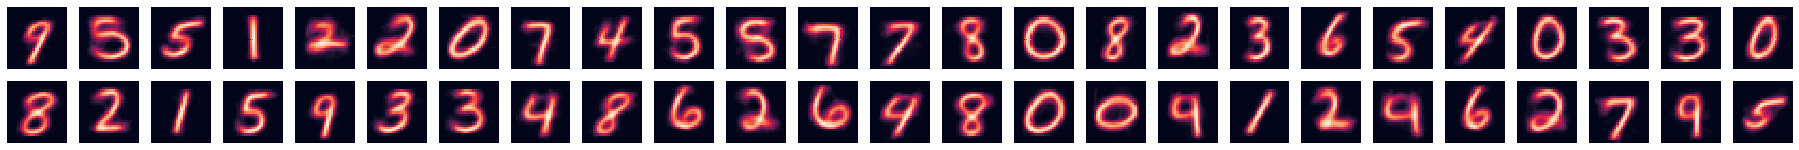

In [387]:
# libraries
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Split into mixtures
gfs = torch.tensor_split(Lambda, output_dim, dim=0)

# Transform back into the pixel relm 
weights_to_numpy = transforms.Compose([ 
    transforms.Lambda(lambda x: x - 1),
    transforms.Lambda(lambda x: x.reshape(28, 28)),
    #transforms.Lambda(lambda x: torch.round(x)),
    transforms.Lambda(lambda x: x / x.sum()),
    transforms.Lambda(lambda x: x.numpy())])
    #transforms.Lambda(lambda x: x * 50),
    #transforms.ToPILImage(mode='L')])

# Make list of images
np_arrays = []
for gf in gfs:
    np_arrays.append(weights_to_numpy(gf))

# Make plots
plt.subplots_adjust(wspace=0.001, hspace=0.001)
fig, axs = plt.subplots(2, 25, figsize=(32,2.5))

for array, ax in zip(np_arrays, axs.ravel()):
    # filter df for ticker and plot on specified axes
    sns.heatmap(array, xticklabels=False, yticklabels=False, cbar=False, ax=ax)

plt.show()

In [320]:
node_labels = torch.tensor([9, 5, 5, 1, 2, 2, 0, 7, 4, 5, 5, 7, 7, 8, 0, 8, 2, 3, 6, 5, 4, 0, 3, 3, 0, 8, 2, 1, 5, 9, 3, 3, 4, 8, 6, 2, 6, 4, 8, 0, 0, 4, 1, 2, 4, 6, 2, 7, 9, 5])
node_labels.size()

torch.Size([50])

### Networks output to an input
#### Mass distribution

In [ ]:
on_mass = torch.zeros(output_dim)
off_mass = torch.zeros(output_dim)

for batch, (x, z) in enumerate(test_dataloader):

    X = torch.squeeze(x)
    for j in range(output_dim-1):
        X = torch.vstack((X,x))

    # E step
    I = torch.sum(torch.log(Lambda)* X, dim = 1)
    I = I - torch.max(I)
    gamma = w * torch.exp(I)
    assert not torch.all(gamma == 0)
    gamma = gamma / gamma.sum()

    on_mass = torch.where(node_labels == z,
                          gamma,
                          0) + on_mass
    off_mass = torch.where(node_labels != z,
                           gamma,
                           0) + off_mass

# Put results in data frame
data = torch.tensor([[0, on_mass[node_labels==0].sum(), off_mass[node_labels==0].sum()],
                     [1, on_mass[node_labels==1].sum(), off_mass[node_labels==1].sum()],
                     [2, on_mass[node_labels==2].sum(), off_mass[node_labels==2].sum()],
                     [3, on_mass[node_labels==3].sum(), off_mass[node_labels==3].sum()],
                     [4, on_mass[node_labels==4].sum(), off_mass[node_labels==4].sum()],
                     [5, on_mass[node_labels==5].sum(), off_mass[node_labels==5].sum()],
                     [6, on_mass[node_labels==6].sum(), off_mass[node_labels==6].sum()],
                     [7, on_mass[node_labels==7].sum(), off_mass[node_labels==7].sum()],
                     [8, on_mass[node_labels==8].sum(), off_mass[node_labels==8].sum()],
                     [9, on_mass[node_labels==9].sum(), off_mass[node_labels==9].sum()]])
px = pd.DataFrame(data.numpy(), columns=['digits', 'on', 'off'])
px['norm_on'] = px['on'] / (px['on'] + px['off'])
px['norm_off'] = px['off'] / (px['on'] + px['off'])

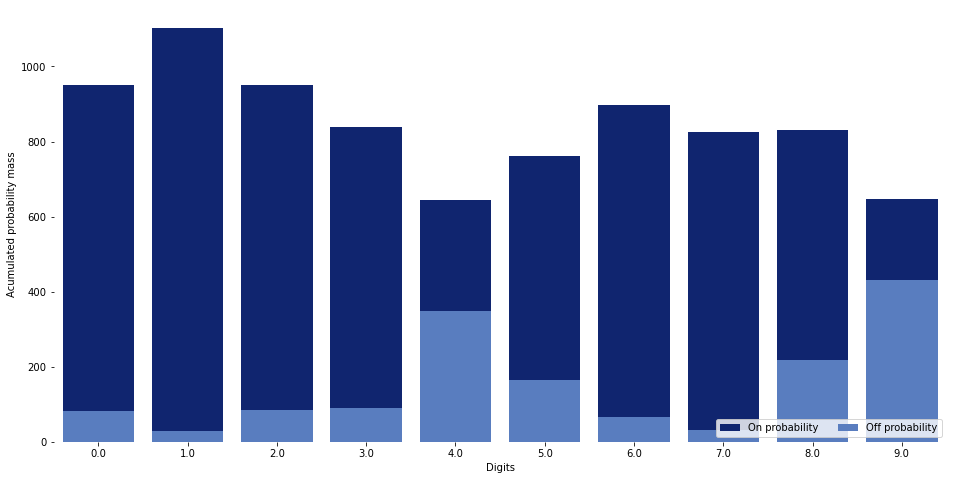

In [ ]:
#sns.set_theme(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(16, 8))

# Plot the total crashes
sns.set_color_codes("dark")
sns.barplot(y="on", x="digits", data=px,
            label="On probability", color="b")

# Plot the crashes where alcohol was involved
sns.set_color_codes("muted")
sns.barplot(y="off", x="digits", data=px,
            label="Off probability", color="b")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(ylabel="Acumulated probability mass",
       xlabel="Digits")
sns.despine(left=True, bottom=True)

#### Overall sensitivity (TPR)

In [374]:
correct = 0
not_correct = 0

for batch, (x, z) in enumerate(test_dataloader):

    X = torch.squeeze(x)
    for j in range(output_dim-1):
        X = torch.vstack((X,x))

    # E step
    I = torch.sum(torch.log(Lambda)* X, dim = 1)
    I = I - torch.max(I)
    gamma = w * torch.exp(I)
    assert not torch.all(gamma == 0)
    gamma = gamma / gamma.sum()
    
    if node_labels[torch.argmax(gamma)] == z:
        correct = correct + 1
    else:
        not_correct = not_correct + 1

correct / (correct + not_correct)

0.8451

#### Examples of miss clasifications

Label of input is:  5
tensor([1.0000e+00, 3.6401e-06, 1.1212e-08, 1.8987e-26, 3.4077e-35, 1.4646e-35, 4.2437e-37, 2.5555e-37, 1.5875e-58, 2.9843e-64], dtype=torch.float64)


<Figure size 432x288 with 0 Axes>

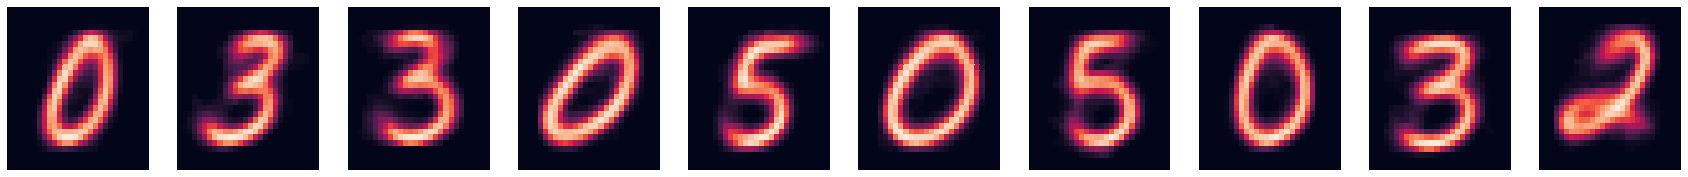

In [389]:
for batch, (x, z) in enumerate(test_dataloader):

    X = torch.squeeze(x)
    for j in range(output_dim-1):
        X = torch.vstack((X,x))

    # E step
    I = torch.sum(torch.log(Lambda)* X, dim = 1)
    I = I - torch.max(I)
    gamma = w * torch.exp(I)
    assert not torch.all(gamma == 0)
    gamma = gamma / gamma.sum()
    
    if node_labels[torch.argmax(gamma)] != z:
        print('Label of input is: ', z.item())
        weights_to_image = transforms.Compose([ 
        transforms.Lambda(lambda x: x - 1),
        #transforms.Lambda(lambda x: torch.round(x)),
        transforms.Lambda(lambda x: x / x.sum()),
        #transforms.Lambda(lambda x: x.numpy()),
        transforms.Lambda(lambda x: x * 50),
        transforms.Lambda(lambda x: x.reshape(28, 28)),
        transforms.ToPILImage(mode='L')])
        img = weights_to_image(x)
        img = img.resize((160, 160))
        img.show()
        
        values, indices = torch.topk(gamma, 10)
        print(values)
        
        # Split into mixtures
        gfs = torch.tensor_split(Lambda[indices], 10, dim=0)

        # Transform back into the pixel relm 
        weights_to_numpy = transforms.Compose([ 
            transforms.Lambda(lambda x: x - 1),
            transforms.Lambda(lambda x: x.reshape(28, 28)),
            #transforms.Lambda(lambda x: torch.round(x)),
            transforms.Lambda(lambda x: x / x.sum()),
            transforms.Lambda(lambda x: x.numpy())])
            #transforms.Lambda(lambda x: x * 50),
            #transforms.ToPILImage(mode='L')])

        # Make list of images
        np_arrays = []
        for gf in gfs:
            np_arrays.append(weights_to_numpy(gf))

        # Make plot
        plt.subplots_adjust(wspace=0.001, hspace=0.001)
        fig, axs = plt.subplots(1, 10, figsize=(30,3))

        for array, ax in zip(np_arrays, axs.ravel()):
            # filter df for ticker and plot on specified axes
            sns.heatmap(array, xticklabels=False, yticklabels=False, cbar=False, ax=ax)

        plt.show()
        break


### Impact of mixing weights on the learning

In [393]:
# They must be positive and in the order of magnitude of the inpout
output_dim = 50
input_dim = test_dataset[0][0].size(dim=0)
Lambda = mean + torch.rand(output_dim, input_dim).double() * sd

# Initialize mixture weight
w = torch.ones(output_dim)
w = w.log_normal_(mean=0, std=1)
w = w / w.sum()

Epoch 1
-------------------------------

Epoch 2
-------------------------------

Epoch 3
-------------------------------


<Figure size 432x288 with 0 Axes>

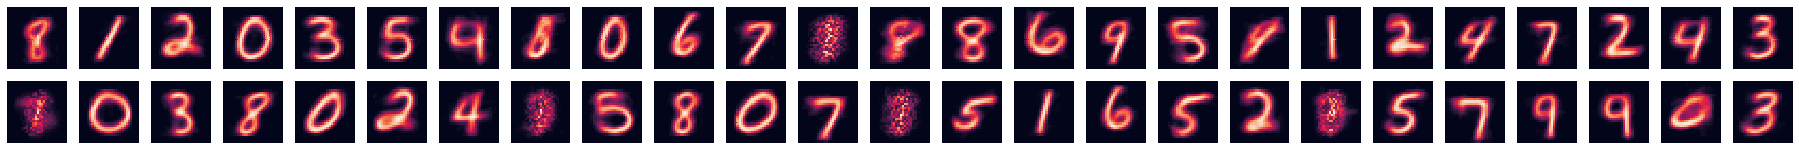


Epoch 4
-------------------------------

Epoch 5
-------------------------------

Epoch 6
-------------------------------


<Figure size 432x288 with 0 Axes>

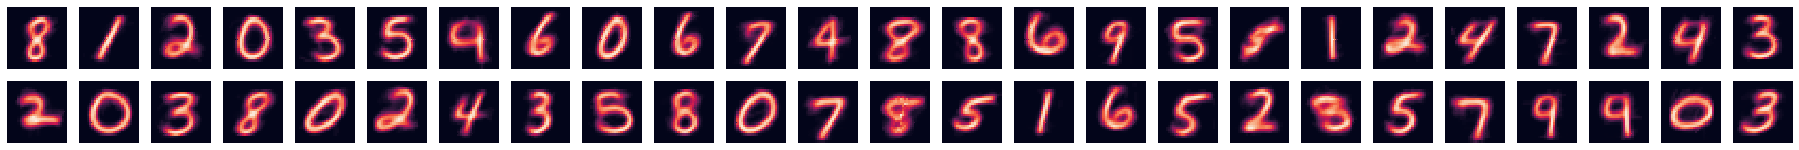


Epoch 7
-------------------------------

Epoch 8
-------------------------------

Epoch 9
-------------------------------


<Figure size 432x288 with 0 Axes>

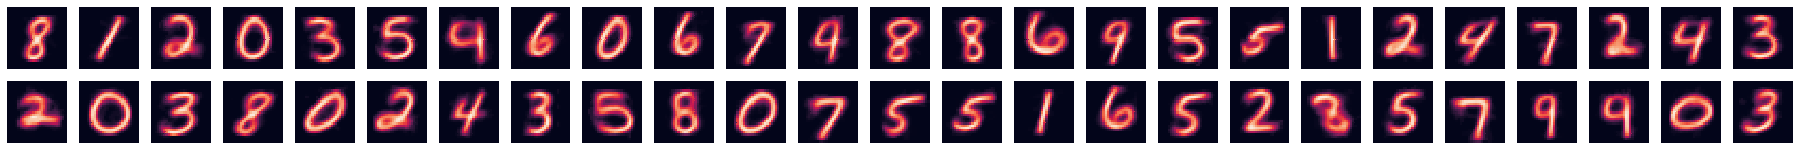


Epoch 10
-------------------------------

Epoch 11
-------------------------------

Epoch 12
-------------------------------


<Figure size 432x288 with 0 Axes>

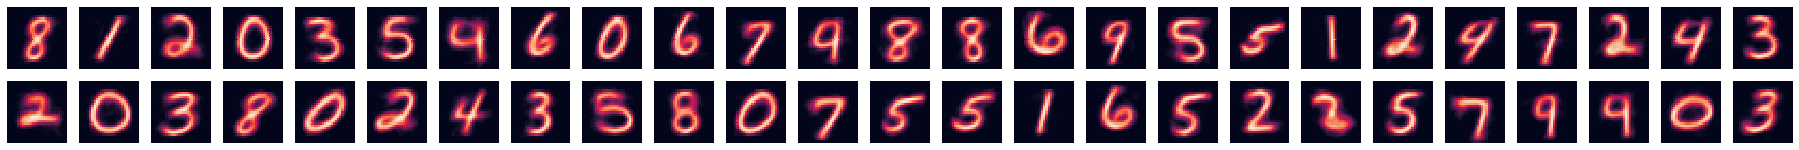


Epoch 13
-------------------------------

Epoch 14
-------------------------------

Epoch 15
-------------------------------


<Figure size 432x288 with 0 Axes>

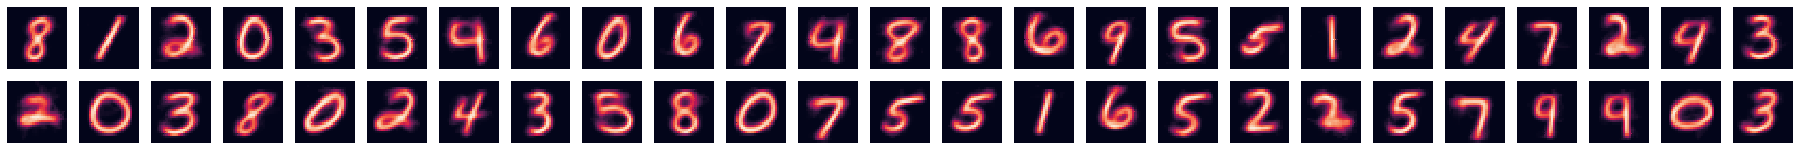


Epoch 16
-------------------------------

Epoch 17
-------------------------------

Epoch 18
-------------------------------


<Figure size 432x288 with 0 Axes>

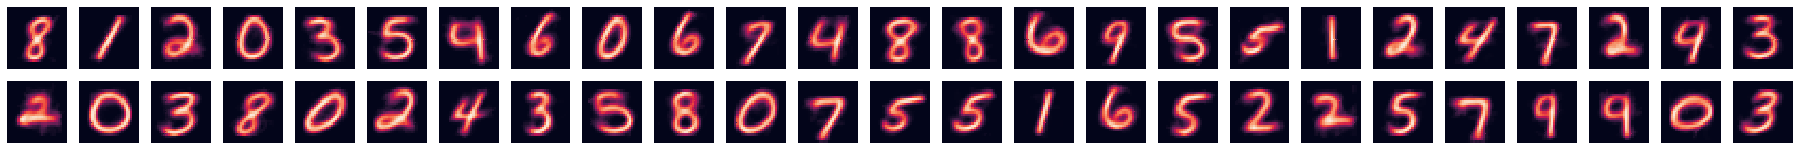


Epoch 19
-------------------------------

Epoch 20
-------------------------------

Epoch 21
-------------------------------


<Figure size 432x288 with 0 Axes>

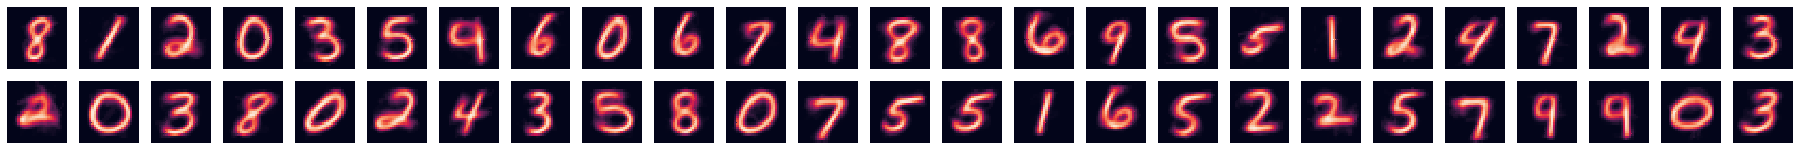


Epoch 22
-------------------------------

Epoch 23
-------------------------------

Epoch 24
-------------------------------


<Figure size 432x288 with 0 Axes>

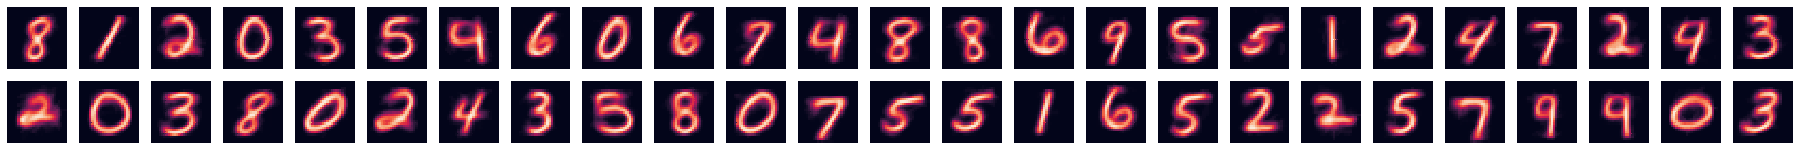


Epoch 25
-------------------------------

Epoch 26
-------------------------------

Epoch 27
-------------------------------


<Figure size 432x288 with 0 Axes>

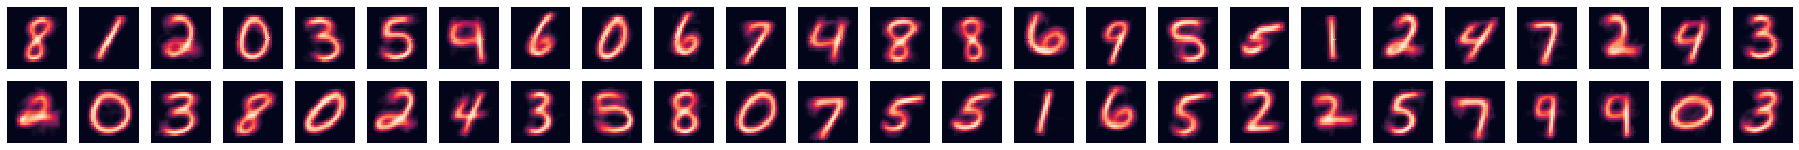


Epoch 28
-------------------------------

Epoch 29
-------------------------------

Epoch 30
-------------------------------


<Figure size 432x288 with 0 Axes>

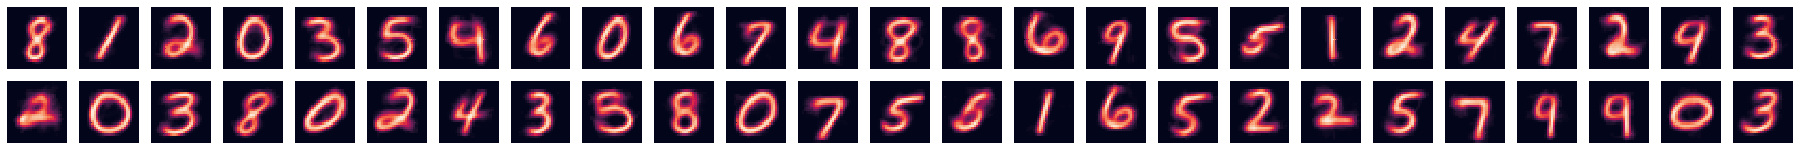


Done!


In [394]:
eta = 5*10**-2
epochs = 30

for epoch in range(epochs):
    print(f"Epoch {epoch+1}\n-------------------------------")
    
    for batch, (x, z) in enumerate(train_dataloader):
        # Make matrix of inputs X for tensor operations
        X = torch.squeeze(x)
        for j in range(output_dim-1):
            X = torch.vstack((X,x))

        # E step
        I = torch.sum(torch.log1p(Lambda)* X, dim = 1)
        I = I - torch.max(I)
        gamma = w * torch.exp(I)
        assert not torch.all(gamma == 0)
        gamma = gamma / gamma.sum()
        assert not torch.any(torch.isnan(gamma)) # at least one of the gammas is nan

        # M step
        grad_matrix = (X - Lambda) / Lambda
        assert not torch.any(torch.isnan(grad_matrix))
        nudge = torch.matmul(torch.diag(gamma).double(), grad_matrix.double())
        assert not torch.any(torch.isnan(nudge))
        new_lambda = Lambda + eta * nudge
        assert not torch.any(torch.isnan(new_lambda))
        Lambda = torch.where(torch.gt(new_lambda,0),
                             new_lambda, 
                             Lambda)
        assert not torch.any(torch.isnan(Lambda))
        Lambda = torch.nn.functional.normalize(Lambda, p=1, dim=1) * A * 2
        assert not torch.any(torch.isnan(Lambda))
    
    if (epoch+1) % 3 == 0:
        # Split into mixtures
        gfs = torch.tensor_split(Lambda, output_dim, dim=0)

        # Transform back into the pixel relm 
        weights_to_numpy = transforms.Compose([ 
            transforms.Lambda(lambda x: x - 1),
            transforms.Lambda(lambda x: x.reshape(28, 28)),
            transforms.Lambda(lambda x: x / x.sum()),
            transforms.Lambda(lambda x: x.numpy())])

        # Make list of images
        np_arrays = []
        for gf in gfs:
            np_arrays.append(weights_to_numpy(gf))

        # Make plots
        plt.subplots_adjust(wspace=0.001, hspace=0.001)
        fig, axs = plt.subplots(2, 25, figsize=(32,2.5))

        for array, ax in zip(np_arrays, axs.ravel()):
            # filter df for ticker and plot on specified axes
            sns.heatmap(array, xticklabels=False, yticklabels=False, cbar=False, ax=ax)

        plt.show()
        
    print('') # Print in a new line

# Print finishing message 
print('Done!')

In [398]:
node_labels = torch.tensor([8, 1, 2, 0, 3, 5, 4, 6, 0, 6, 7, 4, 8, 8, 6, 9, 5, 5, 1, 2, 4, 7, 2, 4, 3, 2, 0, 3, 8, 0, 2, 4, 3, 5, 8, 0, 7, 5, 5, 1, 6, 5, 2, 2, 5, 7, 9, 9, 0, 3])
node_labels.size()

torch.Size([50])

#### Mass disrtribution

In [402]:
on_mass = torch.zeros(output_dim)
off_mass = torch.zeros(output_dim)

for batch, (x, z) in enumerate(test_dataloader):

    X = torch.squeeze(x)
    for j in range(output_dim-1):
        X = torch.vstack((X,x))

    # E step
    I = torch.sum(torch.log(Lambda)* X, dim = 1)
    I = I - torch.max(I)
    gamma = w * torch.exp(I)
    assert not torch.all(gamma == 0)
    gamma = gamma / gamma.sum()

    on_mass = torch.where(node_labels == z,
                          gamma,
                          0) + on_mass
    off_mass = torch.where(node_labels != z,
                           gamma,
                           0) + off_mass

# Put results in data frame
data = torch.tensor([[0, on_mass[node_labels==0].sum(), off_mass[node_labels==0].sum()],
                     [1, on_mass[node_labels==1].sum(), off_mass[node_labels==1].sum()],
                     [2, on_mass[node_labels==2].sum(), off_mass[node_labels==2].sum()],
                     [3, on_mass[node_labels==3].sum(), off_mass[node_labels==3].sum()],
                     [4, on_mass[node_labels==4].sum(), off_mass[node_labels==4].sum()],
                     [5, on_mass[node_labels==5].sum(), off_mass[node_labels==5].sum()],
                     [6, on_mass[node_labels==6].sum(), off_mass[node_labels==6].sum()],
                     [7, on_mass[node_labels==7].sum(), off_mass[node_labels==7].sum()],
                     [8, on_mass[node_labels==8].sum(), off_mass[node_labels==8].sum()],
                     [9, on_mass[node_labels==9].sum(), off_mass[node_labels==9].sum()]])
px = pd.DataFrame(data.numpy(), columns=['digits', 'on', 'off'])
px['norm_on'] = px['on'] / (px['on'] + px['off'])
px['norm_off'] = px['off'] / (px['on'] + px['off'])

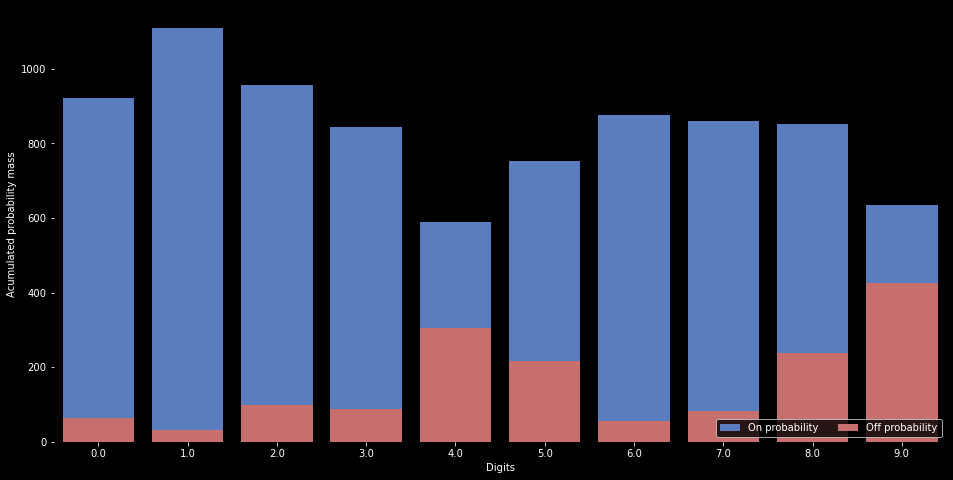

In [414]:
# Plot
#sns.set_theme(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(16, 8))
plt.style.use("dark_background")

# Plot on mass
sns.set_color_codes("muted")
sns.barplot(y="on", x="digits", data=px,
            label="On probability", color="b")

# Plot off mass
sns.set_color_codes("muted")
sns.barplot(y="off", x="digits", data=px,
            label="Off probability", color="r")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(ylabel="Acumulated probability mass",
       xlabel="Digits")
sns.despine(left=True, bottom=True)

#### Overall sensitivity (TPR)

In [400]:
correct = 0
not_correct = 0

for batch, (x, z) in enumerate(test_dataloader):

    X = torch.squeeze(x)
    for j in range(output_dim-1):
        X = torch.vstack((X,x))

    # E step
    I = torch.sum(torch.log(Lambda)* X, dim = 1)
    I = I - torch.max(I)
    gamma = w * torch.exp(I)
    assert not torch.all(gamma == 0)
    gamma = gamma / gamma.sum()
    
    if node_labels[torch.argmax(gamma)] == z:
        correct = correct + 1
    else:
        not_correct = not_correct + 1

correct / (correct + not_correct)

0.8399

### Further investigations

#### Learning in Neural Populations
* We can make it so the input to the network comes from 2 disticnt neural populations, or two stimuly, for example two images. 
* The idea would be then to see what the network learns when the output is rather the classification inputs that come from two distinct generating distributions. 

## Literature

+ [Feedforward Inhibition and Synaptic Scaling – Two Sides of the Same Coin?](https://journals.plos.org/ploscompbiol/article?id=10.1371/journal.pcbi.1002432)
+ [Normalization as a canonical neural computation](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3273486/#R45)
+ [Summation and Division by Neurons in Primate Visual Cortex](https://www.jstor.org/stable/2884085)
+ [Homeostatic Regulation of Neuronal Excitability](http://www.scholarpedia.org/article/Homeostatic_Regulation_of_Neuronal_Excitability)
+ [Input normalization by global feedforward inhibition expands cortical dynamic range](https://www.nature.com/articles/nn.2441)
+ [Lognormal firing rate distribution reveals prominent fluctuation–driven regime in spinal motor networks](https://elifesciences.org/articles/18805#abstract)
+ [Expectation-Maximization for Estimating
Parameters for a Mixture of Poissons](https://www.cs.helsinki.fi/u/bmmalone/probabilistic-models-spring-2014/mixture-of-poissons.pdf)
+ [Gradient Ascent](https://web.stanford.edu/class/archive/cs/cs109/cs109.1192/lectureNotes/22%20-%20GradientAscent.pdf)
+ [A review of multivariate
distributions for count data derived
from the Poisson distribution](https://www.cs.cmu.edu/~pradeepr/paperz/wics1398.pdf)

## TODO
* find way of monitoring the lambdas and see why they are going to NAN (maybe double check that the operations are correct)
* put the correct implementation on gamma in the document :)
* i think maybe the problem is that the lambdas are not bouded, they can all collecttively increase, even if they are not suoper high such that a neuron becomes dominant. 
* now the problem is that most of the lambdas are very small numbers, once the training has evovled, and the we have the numerical problem that when the product or the exponential is computed they go te zero and when the division is made then we have a nan. 
* Maybe the answer is to increase A such that this doesnt happen?